In [63]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [64]:
def get_diag_corr(df):
    """Функция формирует диагональную половину матрицы корреляции без главной диагонали.
    Аргументы:
    df - входной датафрейм.
    Возвращает:
    обрезанную матрицу корреляции.
    """
    corr_ = df.corr()
    mask_1 = np.triu(np.ones_like(corr_))
    mask_2 = np.eye(corr_.shape[0])
    return corr_*(mask_1 - mask_2)

def get_drop_list(df, corr_tres):
    """Функция формирует список индексов признаков, 
    для которых коэффициент корреляции с другими признаками превышает порог.
    Аргументы:
    df - входной датафрейм,
    corr_tres - порог коэффициента корреляции.
    Возвращает:
    drop_list - список индексов признаков.
    """
    diag_corr = get_diag_corr(df).abs()
    drop_list = list(set(np.where(diag_corr > corr_tres)[1]))
    return drop_list

def hi_corr_del(df, feat_list, corr_tres):
    """Функция удаляет признаки с высоким кэффициентом корреляции с другими признаками.
    Аргументы:
    df - входной датафрейм,
    feat_list - список анализируемых признаков,
    corr_tres - порог коэффициента корреляции.
    Возвращает:
    df_curr - очищенный от мультиколлинеарности датафрейм,
    drop_name_list - список удаленных признаков.
    """
    df_curr = df[feat_list].copy()
    drop_list = get_drop_list(df_curr, corr_tres)
    
    if len(drop_list) != 0:  # Проверяем, надо ли удалять признаки
        drop_name_list = []         # Список удаленных признаков
        while len(drop_list) > 1:   # Удаляем признаки по одному
            num_cols=list(df_curr.columns)
            drop_list = get_drop_list(df_curr[num_cols], corr_tres)
            drop_curr = drop_list[0]
            drop_name = df_curr.columns[drop_curr]
            drop_name_list.append(drop_name)
            df_curr.drop(drop_name, axis=1, inplace=True)
        return df_curr, drop_name_list
    else:
        print('Признаков для удаления нет')
        return df_curr, []

In [65]:
df = pd.read_excel('marked.xlsx')

In [66]:
df.head(2)

,Параметр,х001,х002,х005,х006,х007,х008,х009,х010,х011,...,х039,х040,х041,х042,х043,х044,х045,х046,х047,х048
0,2021-03-24 13:50:00,577.64,566.55,590.45,576.19,573.11,571.31,590.91,589.67,579.19,...,577.83,560.46,556.89,555.97,585.74,581.3,561.09,560.34,577.21,577.46
1,2021-03-24 14:00:00,586.00,572.80,599.18,585.74,580.65,578.99,596.22,597.53,585.06,...,591.73,569.11,565.92,564.06,589.19,591.2,569.13,568.94,581.37,585.81


In [67]:
# Формируем список признаков для вычисления корреляции
feat_list = list(df.columns)[1:]

In [68]:
# Проверяем, есть ли признаки с высокой корреляцией
corr_tres = 0.99         # порог коэффициента корреляции

hi_corr_feat_list = get_drop_list(df, corr_tres)
print(f'{len(hi_corr_feat_list)} признака из {len(feat_list)} имеют коэффициент корреляции выше {corr_tres}')

23 признака из 44 имеют коэффициент корреляции выше 0.99


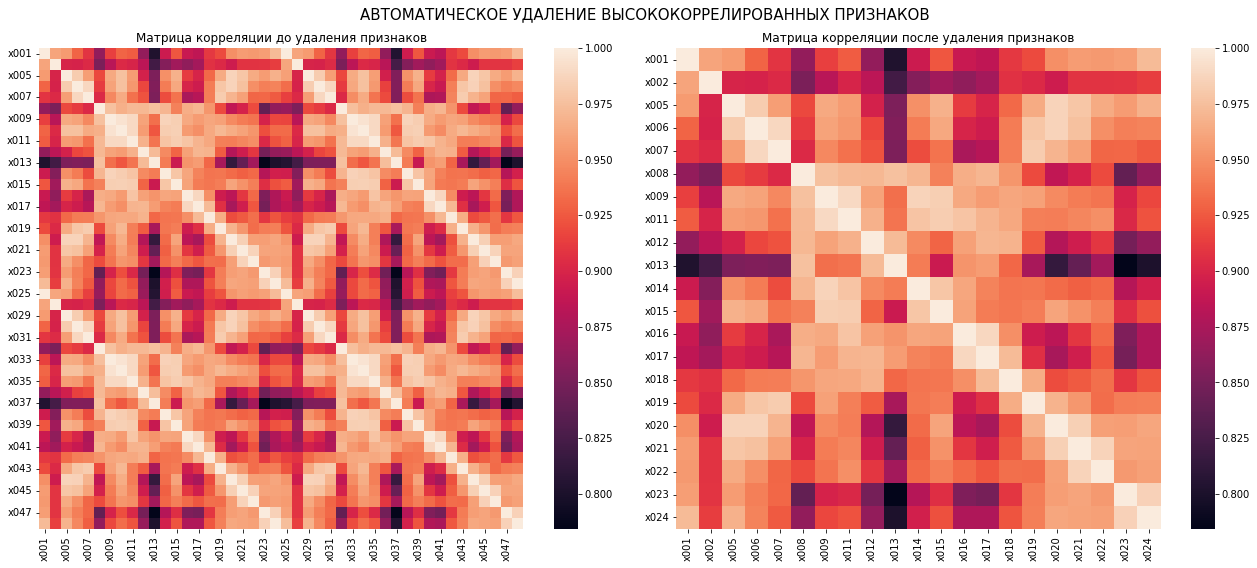

Количество удаленных признаков 23:
 ['х010', 'х025', 'х026', 'х029', 'х030', 'х042', 'х043', 'х044', 'х045', 'х046', 'х047', 'х048', 'х031', 'х032', 'х033', 'х034', 'х035', 'х036', 'х037', 'х041', 'х038', 'х039', 'х040']


In [69]:
cm_raw = df.corr()           # Матрица корреляции до удаления признаков
df_clear, drop_name_list = hi_corr_del(df, feat_list, corr_tres)
cm_clear = df_clear.corr()   # Матрица корреляции после удаления признаков

# Визуализация
fig, axx = plt.subplots(1, 2, figsize=(18, 8))
plt.suptitle("АВТОМАТИЧЕСКОЕ УДАЛЕНИЕ ВЫСОКОКОРРЕЛИРОВАННЫХ ПРИЗНАКОВ", fontsize=15)
plt.sca(axx[0])
sns.heatmap(cm_raw)
plt.title('Матрица корреляции до удаления признаков', fontsize=12)

plt.sca(axx[1])
sns.heatmap(cm_clear)
plt.title('Матрица корреляции после удаления признаков', fontsize=12)

plt.tight_layout()
plt.show()
print(f'Количество удаленных признаков {len(drop_name_list)}:\n {drop_name_list}')